# AffectNet data perparation notebook

The data is split into three folders:
train
test
val

Each folder has folders numbered from 0 to 7 representing the different classes of emotion recognition.

We will transform the data into an Images folder and a labels.csv file.

Dataset source: https://www.kaggle.com/datasets/yakhyokhuja/affectnetaligned <br>
Note: This source doesn't contain the full affectnet dataset, only a subset of it.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, os, shutil

In [2]:
data_path = os.path.join('..', 'data', 'datasets', 'emotion recognition', 'AffectNet', 'AffectNetCustom')
output_dir = os.path.join('..', 'data', 'datasets', 'emotion recognition', 'AffectNet')
os.path.exists(data_path), os.path.exists(output_dir)

(True, True)

In [3]:
label_translation = {
    0 : 'anger',
    1 : 'disgust',
    2 : 'fear',
    3 : 'happy',
    4 : 'sad',
    5 : 'surprise',
    6 : 'neutral'
}

In [4]:
os.makedirs(os.path.join(output_dir, 'Images'), exist_ok = True)

In [5]:
old_file_paths = []
labels = []

for split in os.listdir(data_path):
    for dir in sorted(os.listdir(os.path.join(data_path, split))):

        if int(dir) != 7: # skip contempt label, which is equal to 7
            for file in os.listdir(os.path.join(data_path, split, dir)):
                if file.endswith('.jpg'):
                    old_path = os.path.join(data_path, split, dir, file)
                    old_file_paths.append(old_path)
                    labels.append(int(dir))



In [8]:
filenames = []
final_labels = []
translated_labels = []
counter = 0
for i in range(7):
    for label, old_path in zip(labels, old_file_paths):
        if label == i:
            filenames.append(f'{counter}.jpg')
            final_labels.append(label)
            translated_labels.append(label_translation[label])
            shutil.move(old_path, os.path.join(output_dir, 'Images', f'{counter}.jpg'))
            counter += 1

labels_df = pd.DataFrame(data = {'filename' : filenames, 'label' : final_labels, 'translated' : translated_labels})
labels_df.to_csv(os.path.join(output_dir, 'labels.csv'), index = False)

## EDA

In [10]:
labels_df = pd.read_csv(os.path.join(output_dir, 'labels.csv'))

In [11]:
labels_df.head()

,filename,label,translated
0,0.jpg,0,anger
1,1.jpg,0,anger
2,2.jpg,0,anger
3,3.jpg,0,anger
4,4.jpg,0,anger


In [12]:
labels_df.tail()

,filename,label,translated
37280,37280.jpg,6,neutral
37281,37281.jpg,6,neutral
37282,37282.jpg,6,neutral
37283,37283.jpg,6,neutral
37284,37284.jpg,6,neutral


In [13]:
classes, counts = np.unique(labels_df.label, return_counts = True)

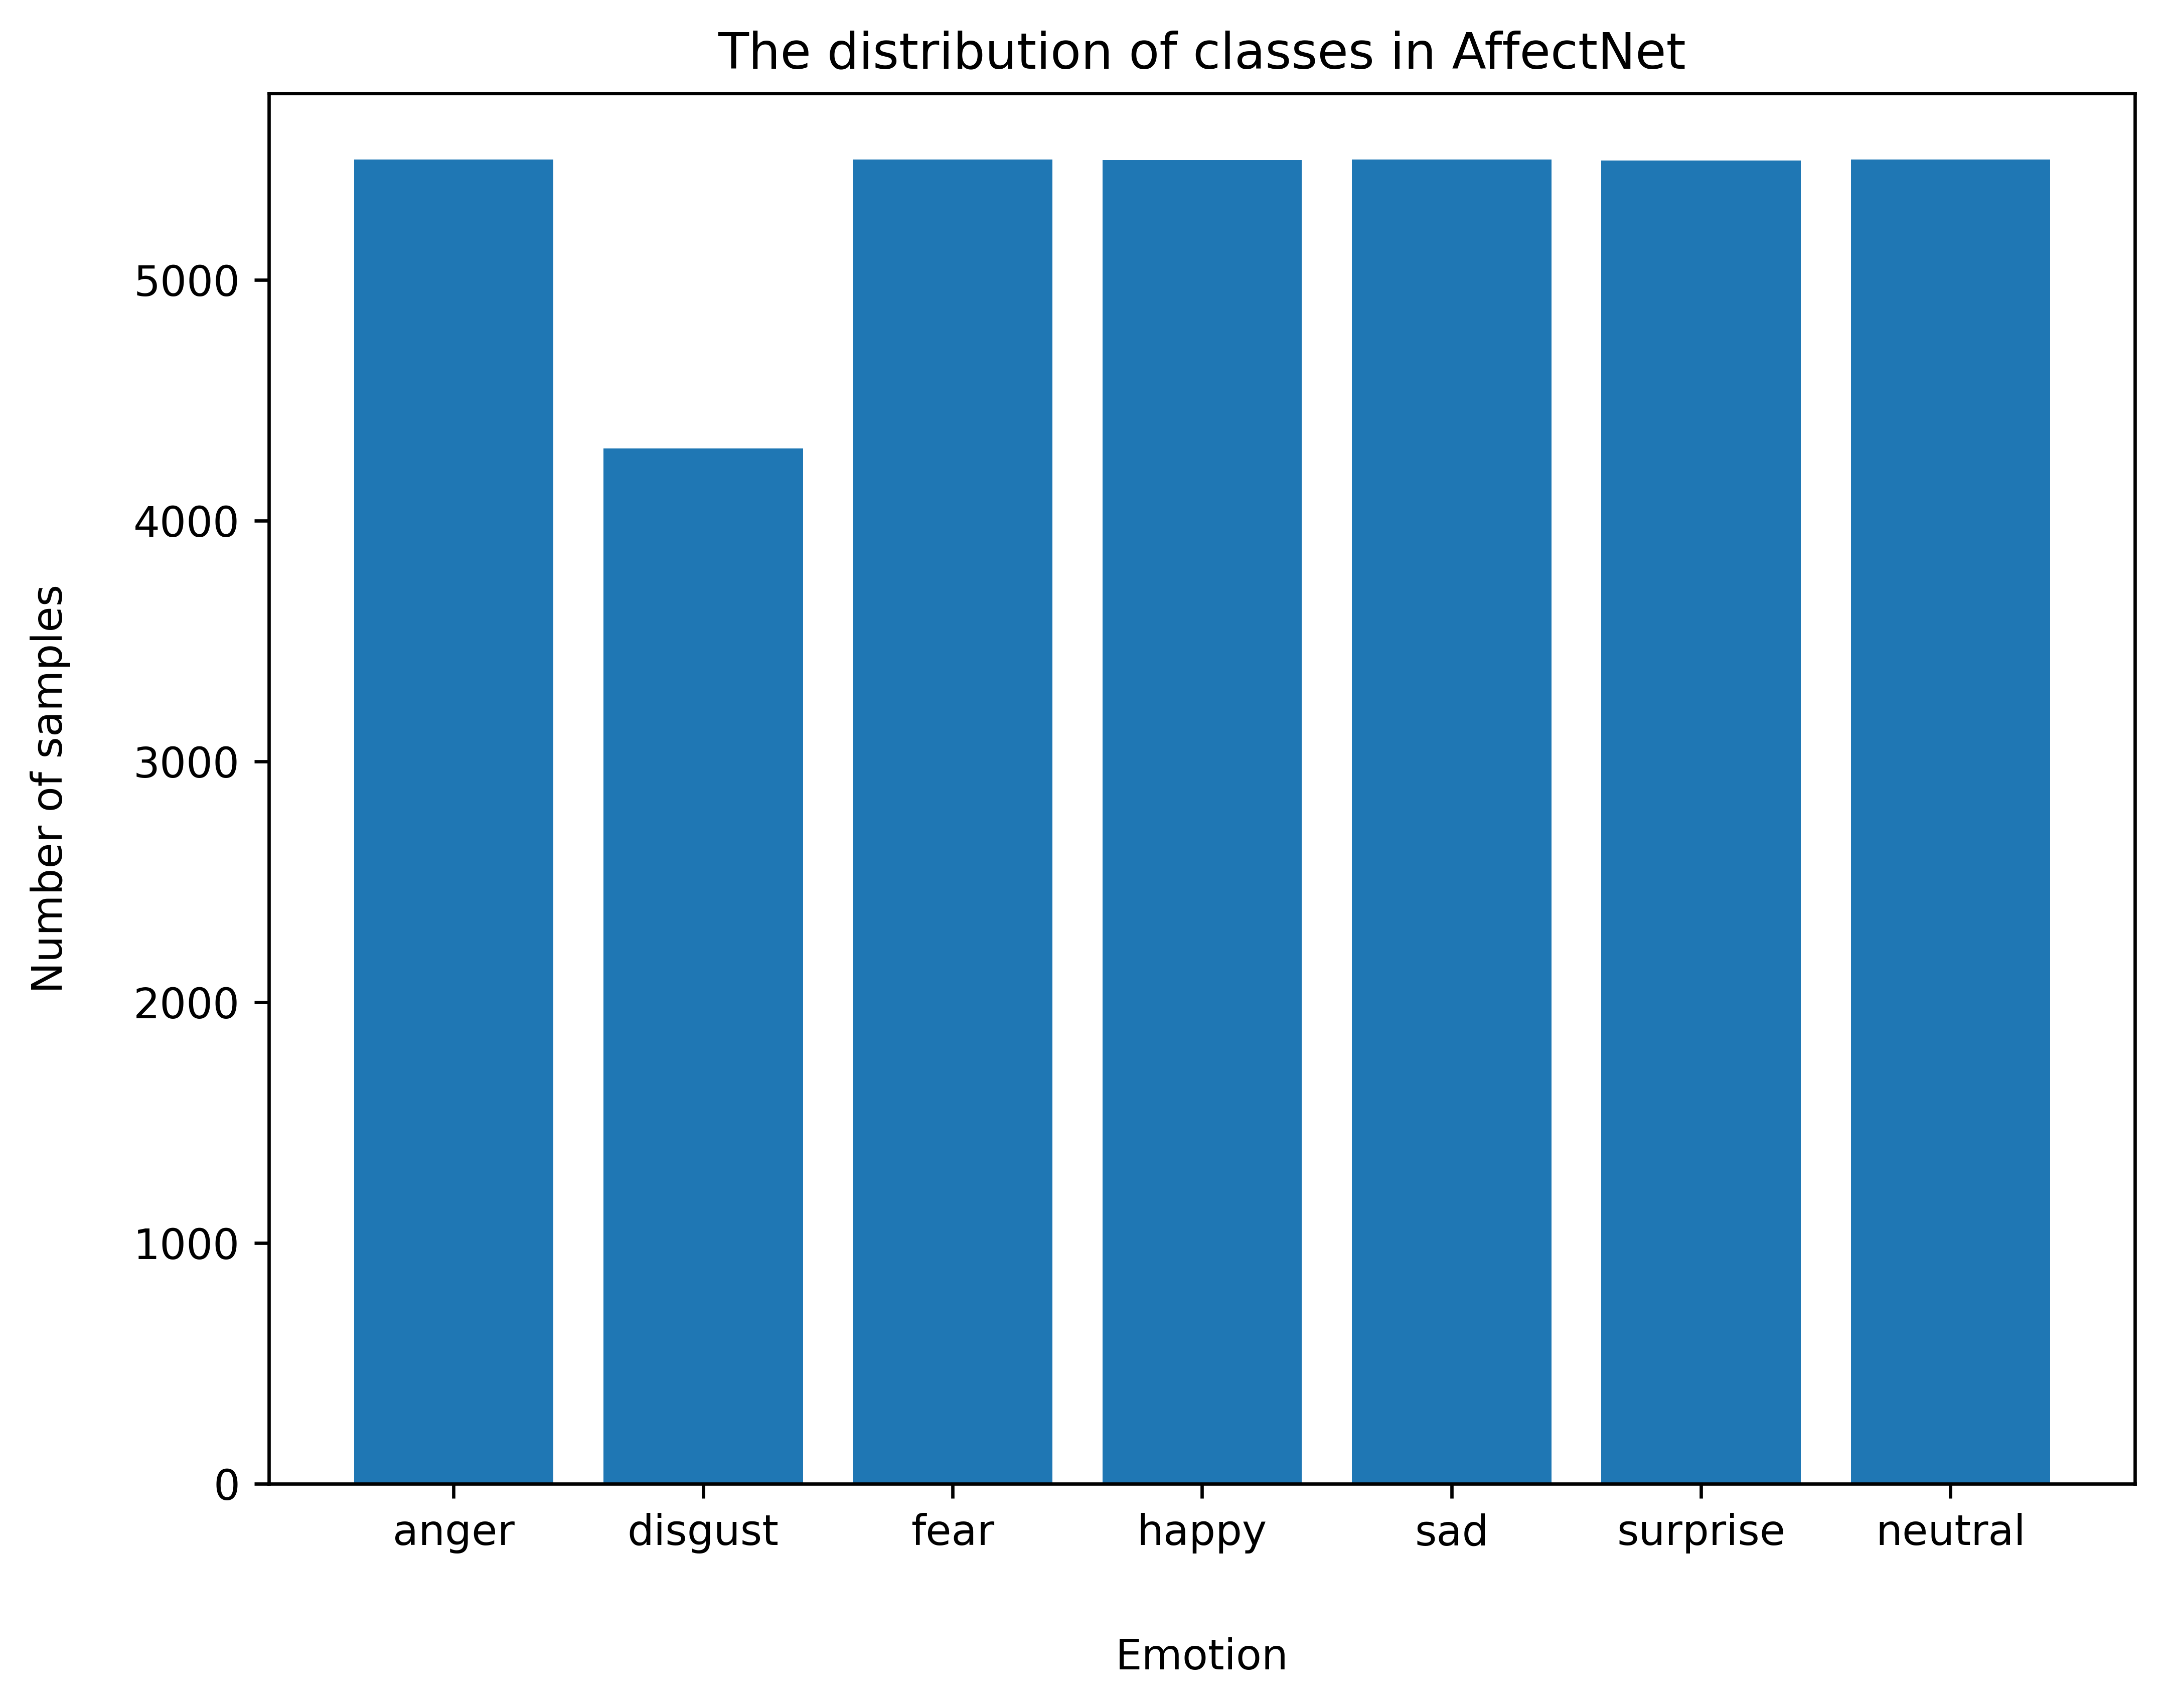

In [21]:
plt.figure(figsize = (8, 6), dpi = 600)
plt.title('The distribution of classes in AffectNet')
plt.bar([label_translation[cls] for cls in classes], counts)
plt.xlabel('Emotion', labelpad = 20)
plt.ylabel('Number of samples', labelpad = 15)
plt.savefig(
    os.path.join('..', 'data', 'figures', 'Emotion Recognition', 'AffectNet', 'The distribution of classes in AffectNet')
)
plt.show()


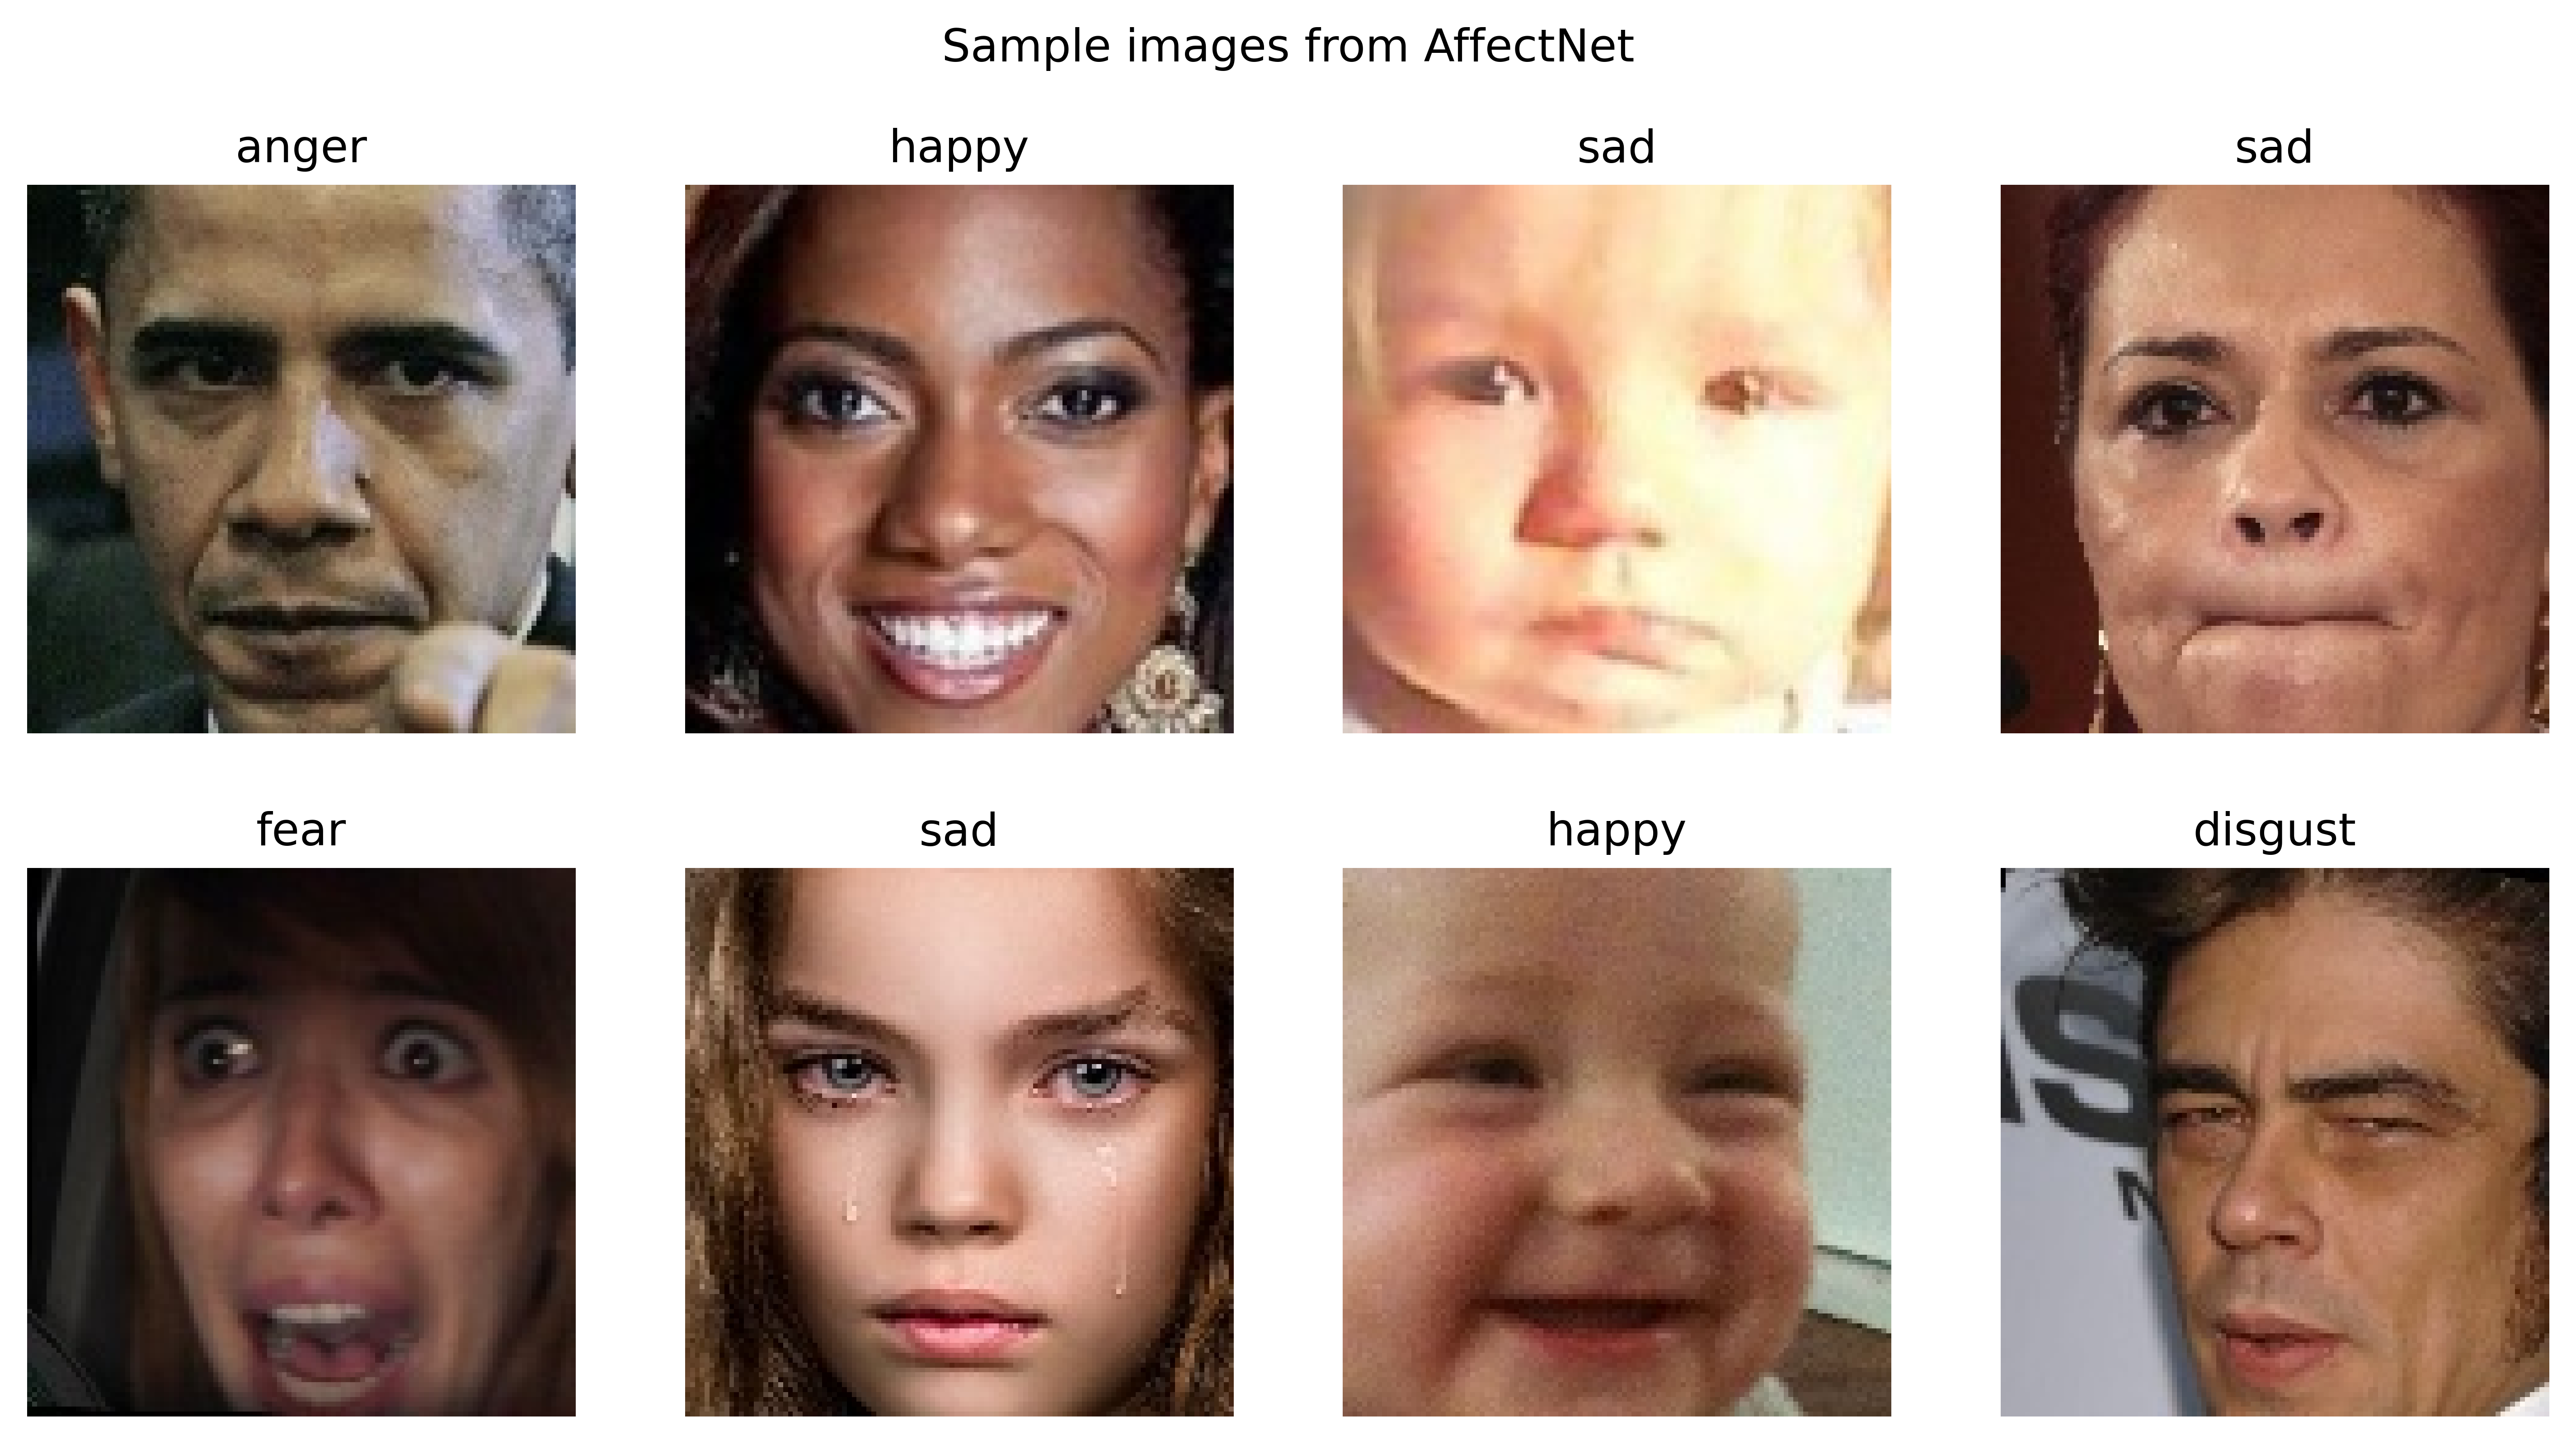

In [34]:
plt.figure(figsize = (12, 6), dpi = 600)
plt.title('Sample images from AffectNet', pad = 30)
plt.axis('off')
for i in range(8):
    idx = np.random.randint(low = 0, high = len(labels_df))
    image_name = labels_df['filename'][idx]
    image = plt.imread(os.path.join(output_dir, 'Images', image_name))
    label_translated = labels_df['translated'][idx]

    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.title(label_translated)
    plt.axis('off')
plt.savefig(
    os.path.join('..', 'data', 'figures', 'Emotion Recognition', 'AffectNet', 'Sample images from AffectNet')
)
plt.show()